[13:00:19] Molecule does not have explicit Hs. Consider calling AddHs()
1000it [10:20,  1.61it/s]


[<rdkit.Chem.rdchem.Mol object at 0x13f6e8430>, <rdkit.Chem.rdchem.Mol object at 0x13f6e82e0>, <rdkit.Chem.rdchem.Mol object at 0x13f6e84a0>, <rdkit.Chem.rdchem.Mol object at 0x13f6e8510>, <rdkit.Chem.rdchem.Mol object at 0x13f6e8580>, <rdkit.Chem.rdchem.Mol object at 0x13f6e8660>, <rdkit.Chem.rdchem.Mol object at 0x13f6e8040>, <rdkit.Chem.rdchem.Mol object at 0x13f6e8270>]


[13:10:41] Initializing MetalDisconnector
[13:10:41] Running MetalDisconnector
[13:10:41] Initializing Normalizer
[13:10:41] Running Normalizer
[13:10:41] Running LargestFragmentChooser
[13:10:41] Running Normalizer
[13:10:41] Running Uncharger
[13:10:41] Initializing MetalDisconnector
[13:10:41] Running MetalDisconnector
[13:10:41] Initializing Normalizer
[13:10:41] Running Normalizer
[13:10:41] Running LargestFragmentChooser
[13:10:41] Running Normalizer
[13:10:41] Running Uncharger
[13:10:41] Initializing MetalDisconnector
[13:10:41] Running MetalDisconnector
[13:10:41] Initializing Normalizer
[13:10:41] Running Normalizer
[13:10:41] Running LargestFragmentChooser
[13:10:41] Running Normalizer
[13:10:41] Running Uncharger
[13:10:41] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7
[13:10:41] Initializing MetalDisconnector
[13:10:41] Running MetalDisconnector
[13:10:41] Initializing Normalizer
[13:10:41] Running Normalizer
[13:10:41] Running LargestFragmentChooser
[13:10:41] Running

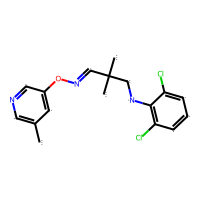

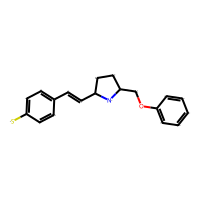

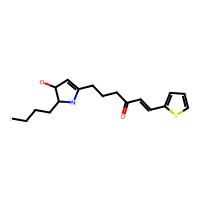

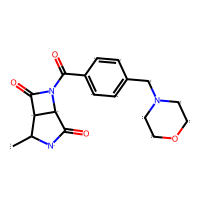

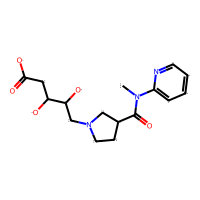

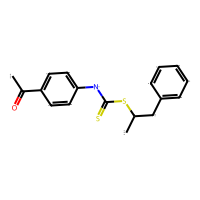

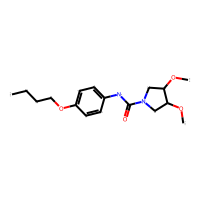

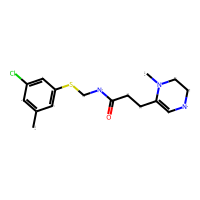

Our Tanimoto - 0.5408010482788086
RDkit Tanimoto - 0.5504494239777187
Our Tanimoto - 0.5208684206008911
RDkit Tanimoto - 0.5751668193117886
Our Tanimoto - 0.6074816584587097
RDkit Tanimoto - 0.49945681694731126
Our Tanimoto - 0.6087720990180969
RDkit Tanimoto - 0.4944732987082168
Our Tanimoto - 0.5413216948509216
RDkit Tanimoto - 0.5614711934156379
Our Tanimoto - 0.5628748536109924
RDkit Tanimoto - 0.5221005409684655
Our Tanimoto - 0.5150948166847229
RDkit Tanimoto - 0.56755710414247
Our Tanimoto - 0.6394801735877991
RDkit Tanimoto - 0.4654983570646221


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [2]:
import py3Dmol

from ml_conformer_generator import MLConformerGenerator
from cheminformatics import evaluate_samples
from rdkit import Chem
from rdkit.Chem import rdDistGeom

from rdkit.Chem import Draw


device = "cpu"
generator = MLConformerGenerator(device=device)


ref_mol = Chem.MolFromSmiles("CCc1noc(C)c1C(=O)NNC(=O)COc1ccccc1C")
rdDistGeom.EmbedMolecule(ref_mol, forceTol=0.001, randomSeed=12)

samples = generator.generate_conformers(reference_conformer=ref_mol, n_samples=10)
print(samples)

for sample in samples:
    smi = Chem.MolFromSmiles(Chem.MolToSmiles(sample))
    img = Draw.MolToImage(smi, size=(200, 200))
    display(img)
    
_, std_samples = evaluate_samples(ref_mol, samples)

view = py3Dmol.view(width=400, height=300, viewergrid=(2,2))

for sample in std_samples:
    view.addModel(sample['mol_block'], 'mol')
    view.setStyle({'stick': {}})
    view.zoomTo()

view.show()